# Integración numérica Montecarlo

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

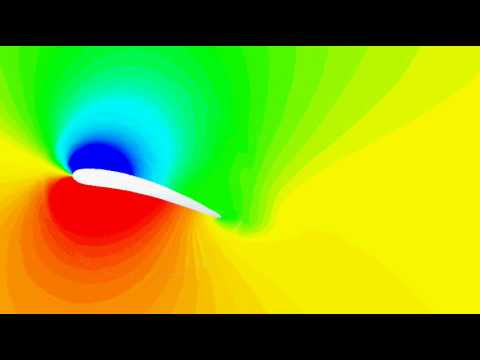

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

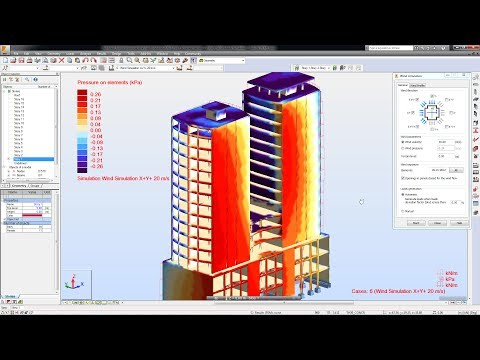

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=(x-2)^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [3]:
# Importamos librería para graficar y numpy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
# Función f(x)=(x-2)**2
def f(x):
    return (x-2)**2

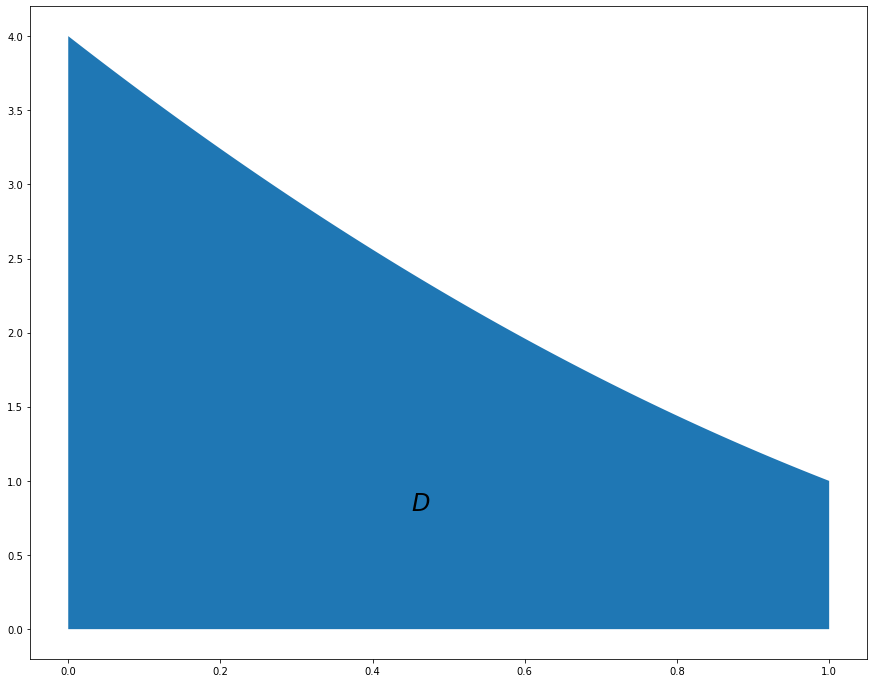

In [5]:
# Dibujamos la región
xnum = np.linspace(0,1,250)
ynum = f(xnum)


plt.figure(figsize =(15,12))
plt.fill_between(xnum,ynum)
plt.text(0.45,0.8,'$D$', fontsize = 24)
plt.show()

Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}(x-2)^2\text{d}x$$.

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=(x-2)^2$ es exactamente el valor promedio de $f(x)=(x-2)^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}(u_i-2)^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

**¿Cómo construir vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [6]:
# ayuda en la funcion uniform de la libreria numpy.random
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [7]:
# Número de puntos para aproximar

N = 100
# Secuencia de N números aleatorios entre 0 y 1

u = np.random.rand(N)


# Aproximación del área

AD_aprox = np.mean(f(u))

print (AD_aprox)

2.256143053143498


En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\left.\frac{(x-2)^3}{3}\right|_{x=0}^{x=1}=\frac{7}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [8]:
# Importamos pandas
import pandas as pd

In [9]:
# Valor exacto del area AD

AD = 7/3

# Cantidades de términos 10, 100, ..., 10**7 (numpy.logspace)

N =np.logspace(1,7,7).astype(int)


# Crear un DataFrame cuyo índice sea la cantidad de términos

tabla = pd.DataFrame(index=N,columns = ['aproximación', 'Error'])

tabla



# el error absoluto


for n in N:
    u = np.random.rand(n)
    tabla.loc[n,'aproximación'] = np.mean(f(u))
    
tabla['Error'] =  np.abs(tabla['aproximación']-AD)   
tabla


,aproximación,Error
10,2.3085,0.0248317
100,2.42873,0.0953918
1000,2.34884,0.0155087
10000,2.33149,0.00184117
100000,2.33039,0.00293951
1000000,2.33272,0.000611608
10000000,2.33361,0.000274184


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i)$$,

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [21]:
# Escribir la función acá

def montecarlo1(f,a,b,N):
    u = np.random.uniform(a,b,N) 
    return (b-a)*np.mean(f(u))


**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [32]:
# Resolver
# 1. Definir las funciones que vamos a integrar

def f1(x):
    return np.exp(x**2)

def f2(x):
    return 1/(np.log10(x))

def f3(x):
    return np.sin(x)/x

# 2. Definimos los limites de integracion
a=2
b=2.1

# 3. Definimos cantidades de terminos

N =np.logspace(1,5,5).astype(int)


In [34]:
tabla2 = pd.DataFrame(index=N,columns = ['f1','f2','f3'])

tabla2.index.name = 'cantidad de terminos'


for n in N:
    tabla2.loc[n,'f1']=montecarlo1(f1,a,b,n)
    tabla2.loc[n,'f2']=montecarlo1(f2,a,b,n)
    tabla2.loc[n,'f3']=montecarlo1(f3,a,b,n)



tabla2


,f1,f2,f3
cantidad de terminos,,,
10,6.41449,0.320417,0.0437955
100,6.73745,0.320859,0.043334
1000,6.76225,0.321273,0.0432718
10000,6.74683,0.320839,0.0432679
100000,6.73963,0.320941,0.0432855


## TAREA 5
1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

**Entregable: se debe subir un archivo con extensión .ipnyb y nombrarlo con el formato T5_PrimerNombrePrimerApellido.ipynb**

## Fecha de entrega:

**Lunes 6 de Abril a las 8:55 am**

https://www.wolframalpha.com/

___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [12]:
# Usar la funcion montecarlo1


De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

In [44]:
def circ_arriba(x,r):
    return np.sqrt(r**2-x**2)

def circ_abajo(x,r):
    return -np.sqrt(r**2-x**2)


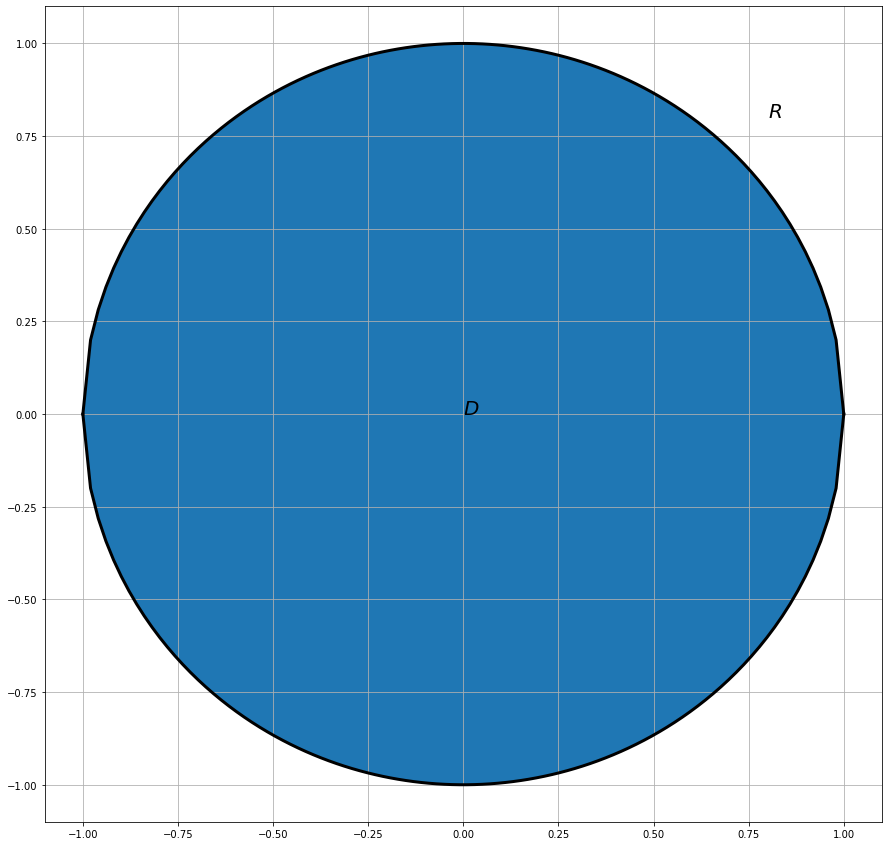

In [46]:
#tabulacion

xnum = np.linspace(-1,1,100)
y1 = circ_arriba(xnum,1)
y2 = circ_abajo(xnum,1)

#crear figura
plt.figure(figsize = (15,15))

#agregar gráficos
plt.plot(xnum, y1, 'k', lw = 3)
plt.plot(xnum, y2, 'k', lw = 3)

#colorear texto
plt.fill_between(xnum, y1, y2)

#texto
plt.text(0,0,'$D$', fontsize =20)
plt.text(0.8,0.8,'$R$', fontsize =20)


plt.grid()
plt.show()


Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

In [ ]:
# Se generan variables aleatorias para cada dimensión
N = 10

x=np.random.uniform(-1,1,N)
y=np.random.uniform(-1,1,N)

In [ ]:
# Se hace el producto cartesiano entre ellas
X,Y=np.meshgrid(x,y)
plt.figure(figsize = (5,5))
plt.scatter(X,Y)
plt.show()

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de $\theta$ se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [15]:
# Función que devuelve True si está dentro del círculo
# y False de lo contrario


In [16]:
# Área del rectángulo

# Aproximación Montecarlo tipo 2


De nuevo, comparemos con el valor exacto.

In [17]:
# Valor exacto del area AD

# Cantidades de términos 10, 100, ..., 10**7 (numpy.logspace)


# Crear un DataFrame cuyo índice sea la cantidad de términos
# y sus columnas sean el valor aproximado de la integral y
# el error relativo


Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [18]:
# Escribir la función acá

    

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [19]:
##~


In [20]:
# Resolver


___
## Error de aproximación de integrales por montecarlo
Ver [documento mit](https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf), página 5.

## TAREA 6
1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

**Entregable: se debe subir un archivo con extensión .ipnyb y nombrarlo con el formato T6_PrimerNombrePrimerApellido.ipynb**

## Fecha de entrega:

**Miércoles 8 de Abril de 2020 a las 23:55**

https://www.wolframalpha.com/

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>